<a href="https://colab.research.google.com/github/pabodaR/customer-churn-prediction/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Churn Prediction**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/portfolio/classification/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Explore dataset**

In [ ]:
#check for null values in the dataframe
df.isnull().sum()

#check for duplicates
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#drop row number, customer id, surname columns - they're unique attributes of a customer and won't matter in prediction
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Geography**



<Axes: ylabel='count'>

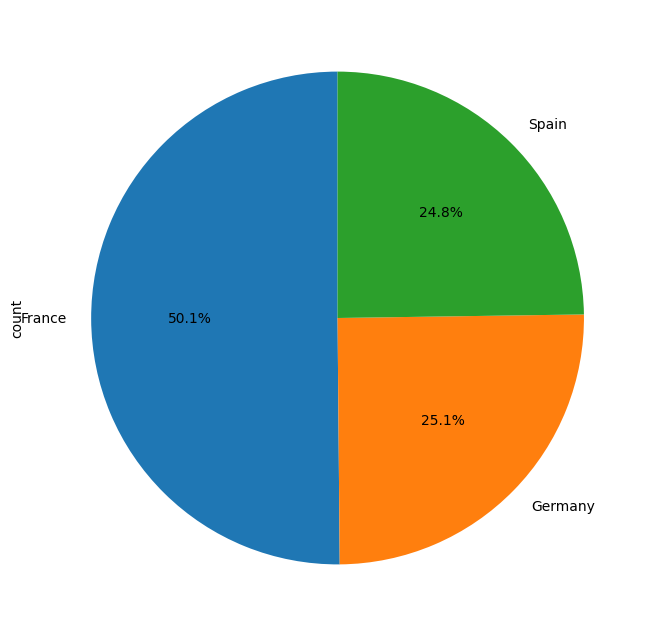

In [ ]:
#visualize geography data
df['Geography'].value_counts().plot(kind = 'pie',autopct='%1.1f%%', startangle=90, figsize=(8, 8))


In [ ]:
#geography vs exited or not

pd.crosstab(df['Exited'],df['Geography'], normalize='columns')*100

Geography,France,Germany,Spain
Exited,,,
0,83.845233,67.556796,83.326605
1,16.154767,32.443204,16.673395


**Conclusion**


*   50% of customers are from France, and Germany, Spain have 25% each
*   32% of the customers from Germany have churned, while 16% each have churned from France and Spain



**Gender**

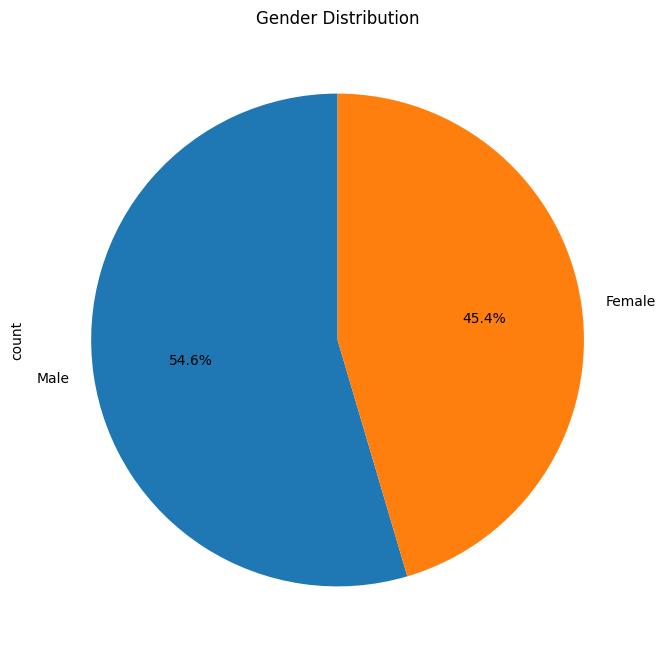

In [ ]:
import matplotlib.pyplot as plt
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8))
plt.title('Gender Distribution')
plt.show()

In [ ]:
pd.crosstab(df['Exited'],df['Gender'], normalize='columns')*100

Gender,Female,Male
Exited,,
0,74.928461,83.544072
1,25.071539,16.455928


**Conclusion:**


*   54% of the customer base is male, and 45% is female
*   25% of the female customers have churned and only 16% of the male customers have churned.



**Has Credit Card**

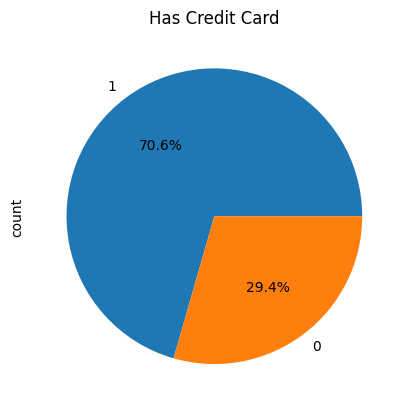

In [ ]:
from enum import auto
df['HasCrCard'].value_counts().plot(kind ='pie', autopct='%1.1f%%')
plt.title('Has Credit Card')
plt.show()

In [ ]:
pd.crosstab(df['Exited'],df['HasCrCard'], normalize='columns')*100

HasCrCard,0,1
Exited,,
0,79.185059,79.815734
1,20.814941,20.184266


**Conclusions:**


*   70% of the customers have a credit card, 29% of the customers don't.
*   20% of the customers each with and without credit cards have churned.



**Is Active Member**

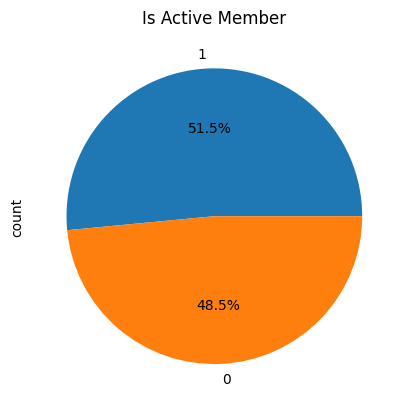

In [ ]:
df['IsActiveMember'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Is Active Member')
plt.show()

In [ ]:
pd.crosstab(df['Exited'],df['IsActiveMember'], normalize='columns')*100

IsActiveMember,0,1
Exited,,
0,73.149103,85.730926
1,26.850897,14.269074


**Conclusions:**


*   51% of the customers are active members and 48% aren't
*   26% of inactive members have churned while only 14% of active members have churned.



**Estimated Salary**

In [ ]:
#summary statistics
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

Text(0.5, 1.0, 'Estimated Salary')

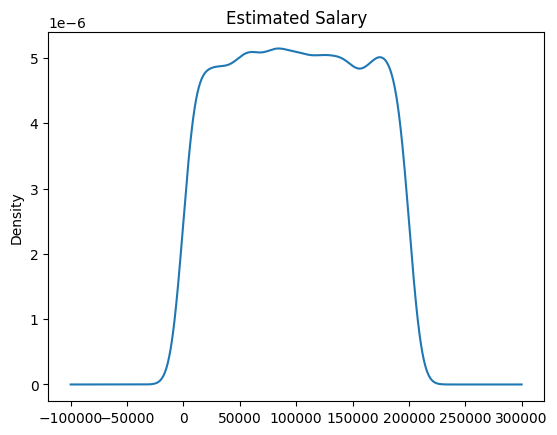

In [ ]:
#understand shape of the data
df['EstimatedSalary'].plot(kind='kde')
plt.title('Estimated Salary')

Text(0.5, 1.0, 'Estimated Salary')

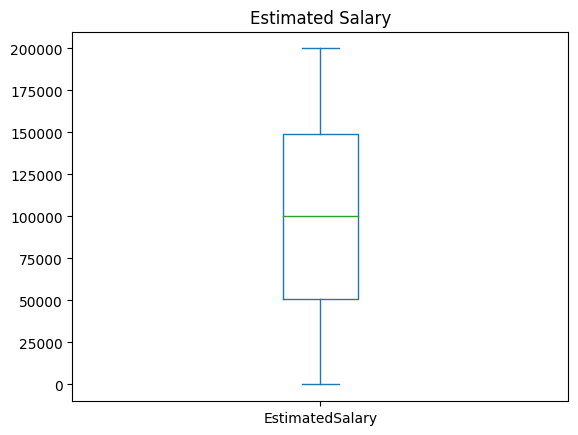

In [ ]:
df['EstimatedSalary'].plot(kind='box')
plt.title('Estimated Salary')

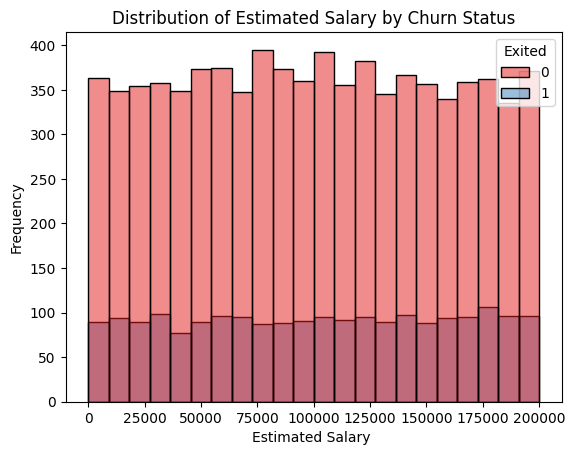

In [ ]:
#Distribution by Target Variable
import seaborn as sns
sns.histplot(data=df, x='EstimatedSalary', hue='Exited', palette='Set1', kde=False)
plt.title('Distribution of Estimated Salary by Churn Status')
plt.xlabel('Estimated Salary ')
plt.ylabel('Frequency')
plt.show()

**Conclusion:**


*   Estimated salary is normally distributed   



**Credit Score**

Text(0.5, 1.0, 'Credit Score')

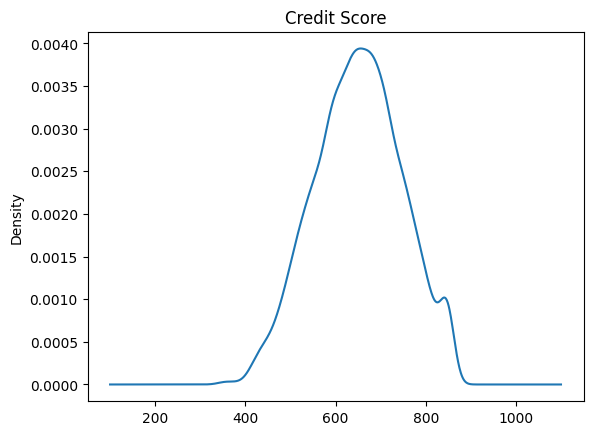

In [ ]:
df['CreditScore'].plot(kind='kde')
plt.title('Credit Score')

Text(0.5, 1.0, 'Credit Score')

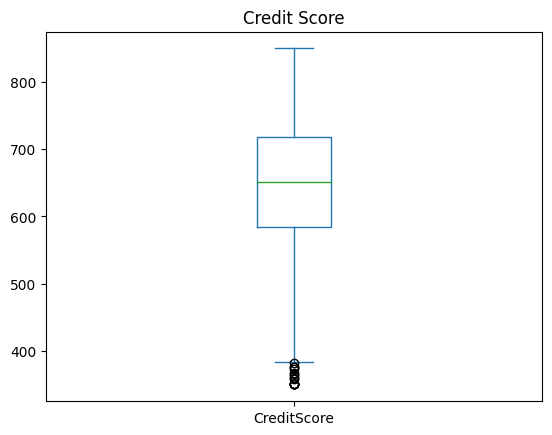

In [ ]:
df['CreditScore'].plot(kind='box')
plt.title('Credit Score')

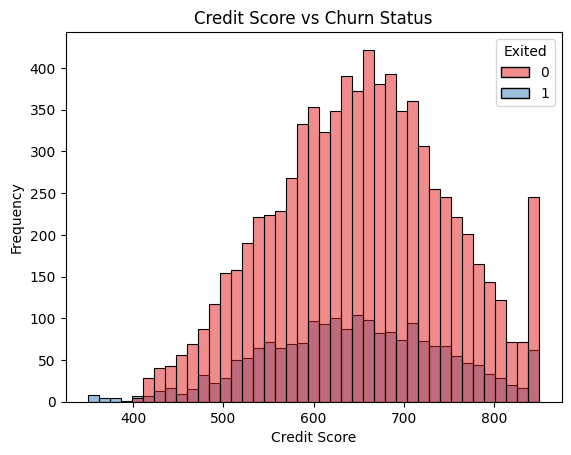

In [ ]:
sns.histplot(data=df, x='CreditScore', hue='Exited', palette='Set1', kde=False)
plt.title('Credit Score vs Churn Status')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

**Conclusion:**


*   Customers with less than 400 credit score have churned.



**Balance**

Text(0.5, 1.0, 'Balance')

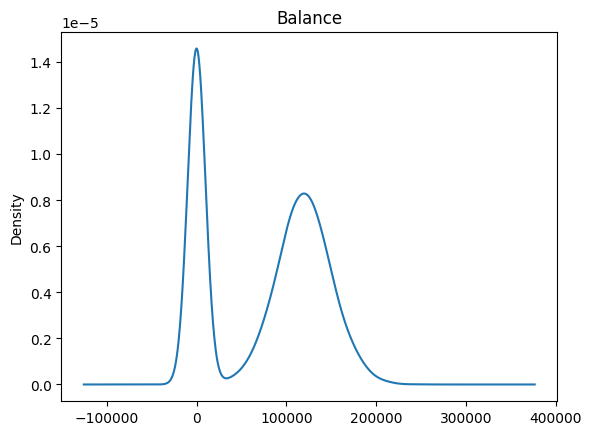

In [ ]:
df['Balance'].plot(kind='kde')
plt.title('Balance')

Text(0.5, 1.0, 'Balance Box Plot')

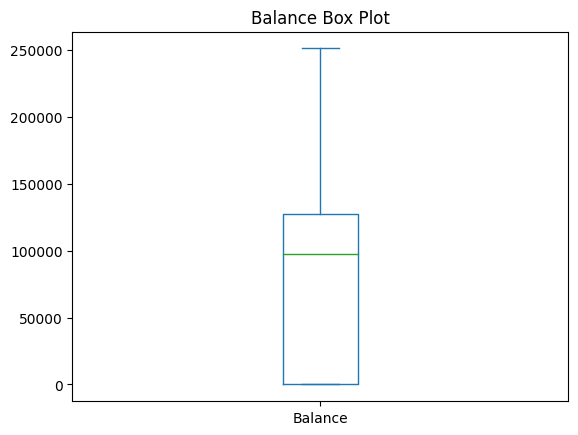

In [ ]:
df['Balance'].plot(kind='box')
plt.title('Balance Box Plot')

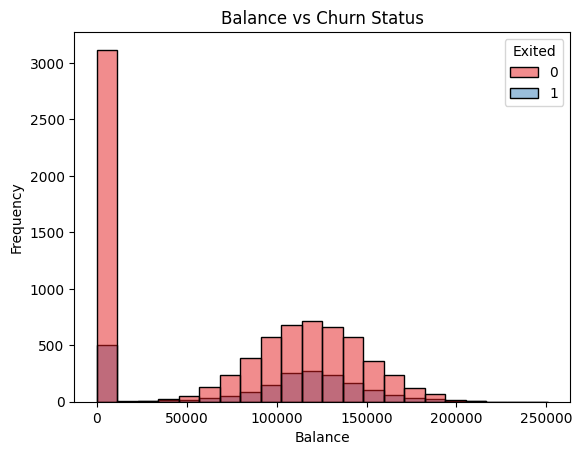

In [ ]:
sns.histplot(data=df, x='Balance', hue='Exited', palette='Set1', kde=False)
plt.title('Balance vs Churn Status')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

**Conclusion:**


*   Balance follows a normal distribution



**Tenure**

In [ ]:
df['Tenure'].value_counts()/len(df)*100


Tenure
2     10.48
1     10.35
7     10.28
8     10.25
5     10.12
3     10.09
4      9.89
9      9.84
6      9.67
10     4.90
0      4.13
Name: count, dtype: float64

In [ ]:
pd.crosstab(df['Exited'],df['Tenure'], normalize='columns')*100

Tenure,0,1,2,3,4,5,6,7,8,9,10
Exited,,,,,,,,,,,
0,76.997579,77.584541,80.820611,78.88999,79.474216,79.347826,79.731127,82.782101,80.780488,78.353659,79.387755
1,23.002421,22.415459,19.179389,21.11001,20.525784,20.652174,20.268873,17.217899,19.219512,21.646341,20.612245


**Conclusion:**


*   The highest percentage of customers, 23% have churned with a 0 tenure.


*   Churn rate doesn't vary much with increasing tenure





**Number of Products**

In [ ]:
df['NumOfProducts'].value_counts()/len(df)*100

NumOfProducts
1    50.84
2    45.90
3     2.66
4     0.60
Name: count, dtype: float64

In [ ]:
pd.crosstab(df['Exited'],df['NumOfProducts'], normalize='columns')*100

NumOfProducts,1,2,3,4
Exited,,,,
0,72.285602,92.418301,17.293233,0.0
1,27.714398,7.581699,82.706767,100.0


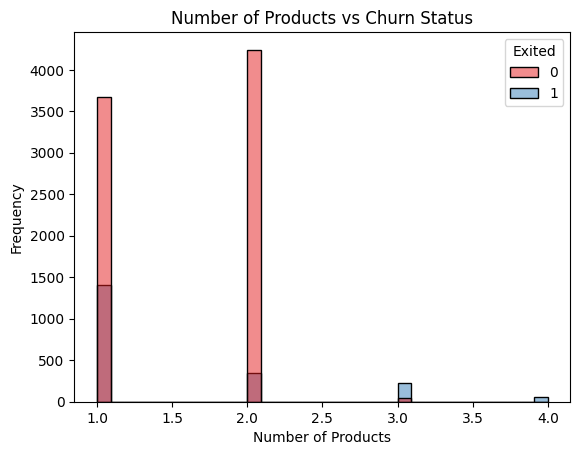

In [ ]:
sns.histplot(data=df, x='NumOfProducts', hue='Exited', palette='Set1', kde=False)
plt.title('Number of Products vs Churn Status')
plt.xlabel('Number of Products')
plt.ylabel('Frequency')
plt.show()

**Conclusion:**


*   Highest percentage of churn is 27% where the number of products is 1



**Data Preprocessing**

In [ ]:
#encode categorical columns
#Gender
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})


In [ ]:
#One hot encode country column
df = pd.get_dummies(df, columns=['Geography'], prefix='Geography')
df = df.astype(int)


**Split to train and test sets**

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(labels = 'Exited', axis = 1)
y = df['Exited']

x_train,x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

**Scale the features**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

**Models**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict and calculate accuracy
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    # Store results
    results[model_name] = {
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    }

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

                        Train Accuracy  Test Accuracy
Logistic Regression           0.811375         0.8110
Decision Tree                 1.000000         0.7765
Random Forest                 1.000000         0.8675
Support Vector Machine        0.864750         0.8560


**Conclusion:**


*   The Logistics regression model performs well in both train and test sets showing good generalization with no overfitting.

*   Decision tree model achieves perfect accuracy on the training set but shows poor performance on test data indicating lack of generalization on new data and overfitting of the model.

*   Random forest model also shows perfect accuracy on training set indicating overfitting, it shows lower performance on test data, however it is greater than that in Decision tree model.

*   SVM model performs well on both the training and testing sets. Its slightly higher training and testing accuracy compared to logistic regression.


**Support Vector Machine (SVM) is recommended for this churn prediction task. It provides a good mix of training and testing accuracy without significant overfitting, making it a robust and reliable model for predicting churn**



